In [1]:
import arakawa as ar
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.ioff()

# Plots

::: arakawa.Plot

Arakawa currently supports the following libraries:

| Library | Site / Docs |
| :--- | :--- |
| [Altair](#altair) | [https://altair-viz.github.io/](https://altair-viz.github.io/) |
| [Matplotlib / Seaborn](#matplotlib) | [https://matplotlib.org/](https://matplotlib.org/) / [https://seaborn.pydata.org/](https://seaborn.pydata.org/) |
| [Bokeh](#bokeh) | [https://bokeh.org/](https://bokeh.org/) |
| [Plotly](#plotly) | [https://plotly.com/python/](https://plotly.com/python/) |
| [Folium](#folium) | [https://python-visualization.github.io/folium/](https://python-visualization.github.io/folium/) |


If you're using another visualization library e.g. Pyvis for networks, try saving your chart as a local HTML file and wrapping that in a [ar.HTML](/reference/blocks/text) block.

## Altair

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python, based on [Vega](http://vega.github.io/vega) and [Vega-Lite](http://vega.github.io/vega-lite). Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](http://vega.github.io/vega-lite) visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

To get started using Altair to make your visualizations, begin with Altair's [Documentation](https://altair-viz.github.io/)

In [2]:
import altair as alt
import pandas as pd
from vega_datasets import data as vega_data

gap = pd.read_json(vega_data.gapminder.url)

select_year = alt.selection_point(
    name="select",
    fields=["year"],
    value={"year": 1955},
    bind=alt.binding_range(min=1955, max=2005, step=5),
)

alt_chart = (
    alt.Chart(gap)
    .mark_point(filled=True)
    .encode(
        alt.X("fertility", scale=alt.Scale(zero=False)),
        alt.Y("life_expect", scale=alt.Scale(zero=False)),
        alt.Size("pop:Q"),
        alt.Color("cluster:N"),
        alt.Order("pop:Q", sort="descending"),
    )
    .add_params(select_year)
    .transform_filter(select_year)
)

ar.Plot(alt_chart)

## Bokeh

Bokeh is an interactive visualization library which provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large datasets. 

To get started using Bokeh to make your visualizations, begin with Bokeh's [User Guide](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide).

In [3]:
from bokeh.plotting import figure
from bokeh.sampledata.iris import flowers

colormap = {"setosa": "red", "versicolor": "green", "virginica": "blue"}
colors = [colormap[x] for x in flowers["species"]]

bokeh_chart = figure(title="Iris Morphology")
bokeh_chart.xaxis.axis_label = "Petal Length"
bokeh_chart.yaxis.axis_label = "Petal Width"

bokeh_chart.circle(
    flowers["petal_length"],
    flowers["petal_width"],
    color=colors,
    fill_alpha=0.2,
    size=10,
)

ar.Plot(bokeh_chart)

## Matplotlib

[Matplotlib](https://matplotlib.org) is the original Python visualization library, often supported and used with [Jupyter Notebooks](https://jupyter.org/). Matplotlib plots are not interactive in Datapane apps, but are saved as SVGs so can be viewed at high fidelity.

Higher-level matplotlib libraries such as [Seaborn](https://seaborn.pydata.org/) are also supported, and can be used in a similar way to the matplotlib example below,

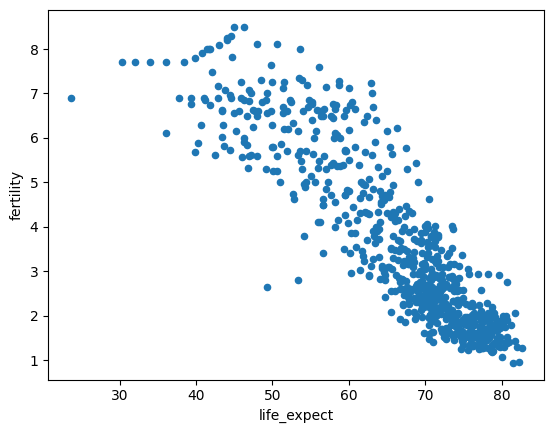

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from vega_datasets import data as vega_data

gap = pd.read_json(vega_data.gapminder.url)
fig = gap.plot.scatter(x="life_expect", y="fertility")


ar.Plot(fig)

!!! info
    
    You can pass either a `matplotlib` `Figure` or `Axes` object to `ar.Plot`,  you can obtain the current global figure from `matplotlib` by running `plt.gcf()`

## Plotly

[Plotly's Python graphing library](https://plotly.com/python/) makes interactive, publication-quality graphs.

In [5]:
import plotly.express as px

df = px.data.gapminder()

plotly_chart = px.scatter(
    df.query("year==2007"),
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
)

ar.Plot(plotly_chart)

## Folium

[Folium](https://python-visualization.github.io/folium/) makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for `choropleth` visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys.

!!! info
    
    If your folium map consumes live data which expires after a certain time, you can automate it to refresh the map on a cadence. See [ar.Dynamic](/reference/apps/compute-blocks/dynamic/).

In [6]:
import folium

m = folium.Map(location=[45.5236, -122.6750])

ar.Plot(m)